Guardado con éxito en promiedosTabla22.csv
Guardado con éxito en promiedosTabla23.csv


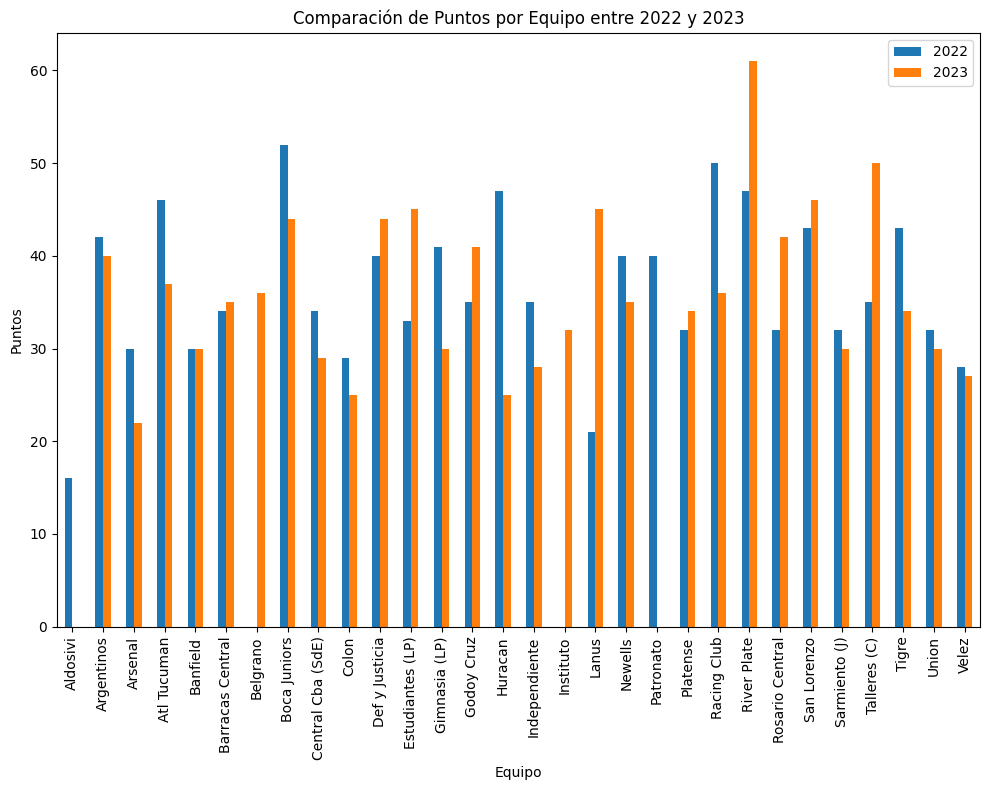

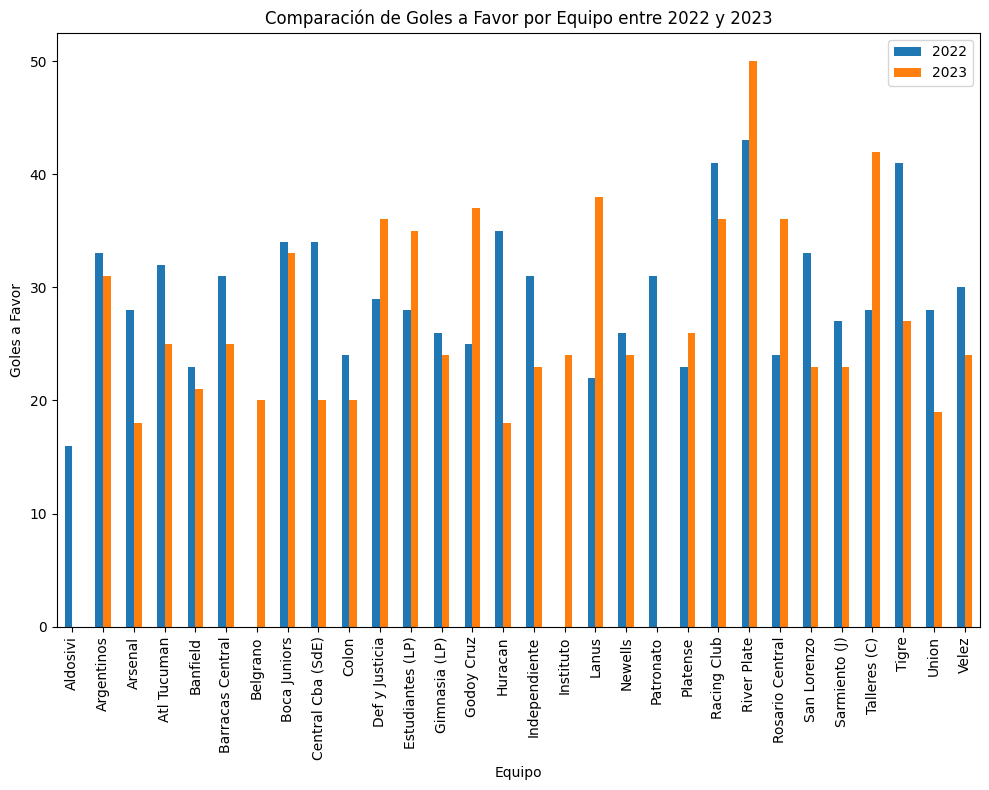

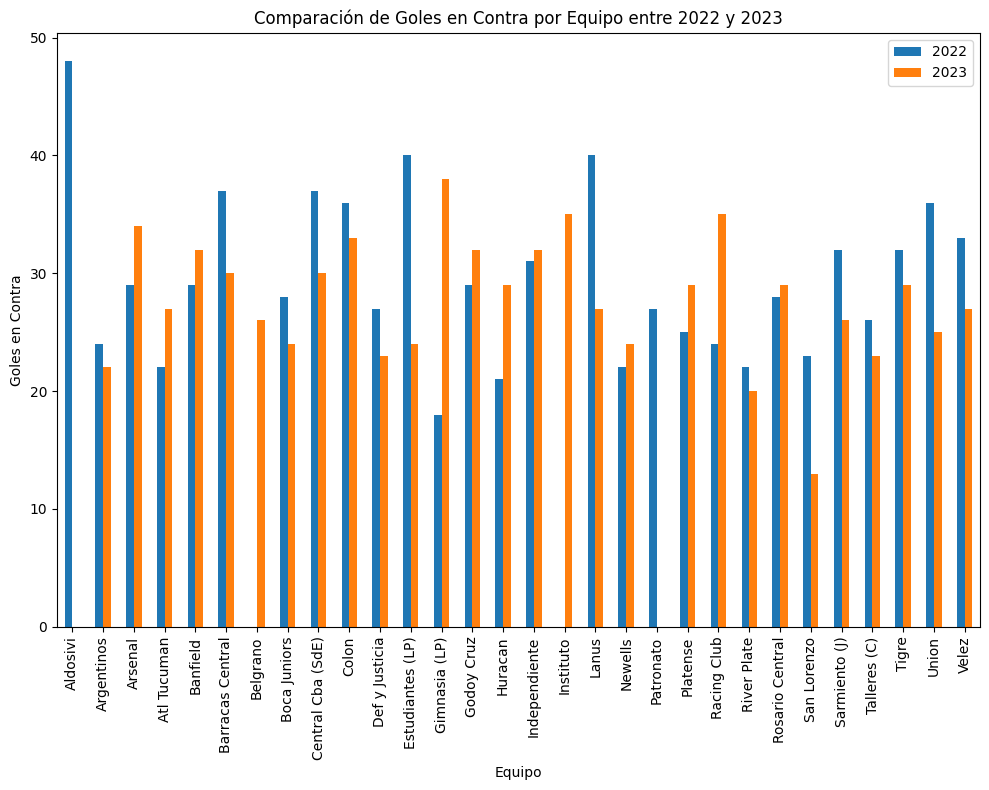

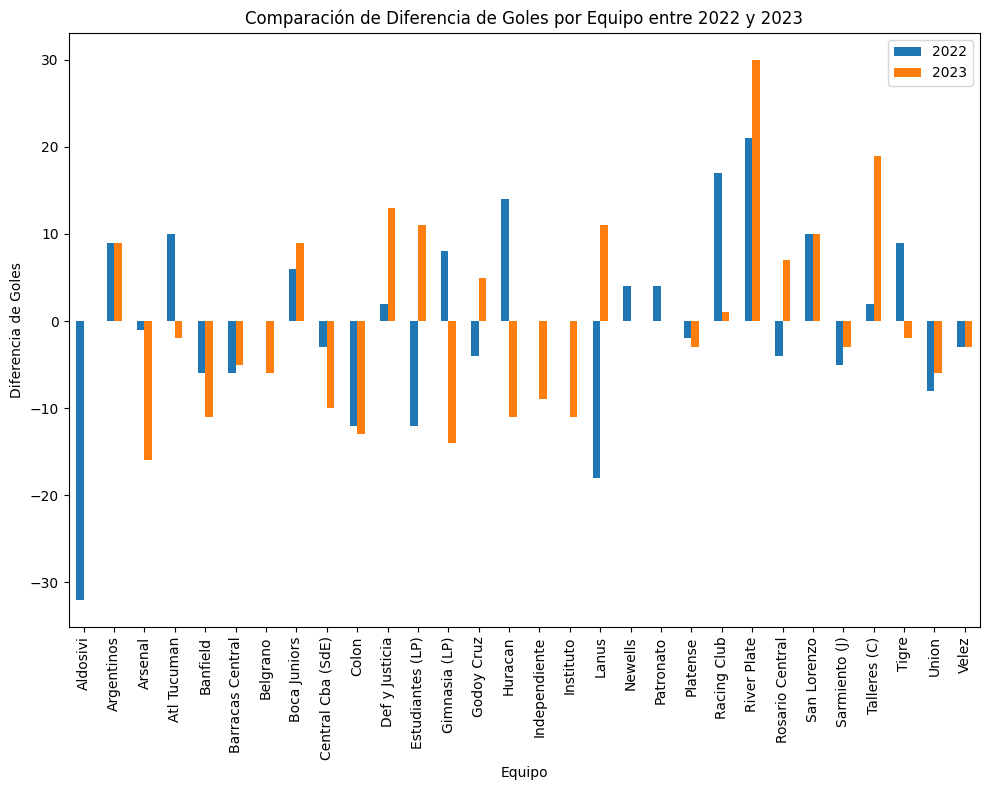

In [26]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Primer URL y extracción de datos
url1 = "https://www.promiedos.com.ar/torneo=1109"
pagina1 = requests.get(url1)
contenido1 = BeautifulSoup(pagina1.content, "html.parser")

# Encontrar la tabla con id "posiciones"
tabla1 = contenido1.find('table', {'id': 'posiciones'})

if tabla1:
    equipos1 = []
    for row in tabla1.find('tbody').find_all('tr'):
        columnas = row.find_all('td')
        posicion = columnas[0].text.strip()
        equipo = columnas[1].text.strip()
        puntos = columnas[2].text.strip()
        jugados = columnas[3].text.strip()
        g = columnas[4].text.strip()
        e = columnas[5].text.strip()
        p = columnas[6].text.strip()
        gf = columnas[7].text.strip()
        gc = columnas[8].text.strip()
        dg = columnas[9].text.strip()

        equipos1.append([posicion, equipo, puntos, jugados, g, e, p, gf, gc, dg])

    # Crear DataFrame
    df1 = pd.DataFrame(equipos1, columns=['Posicion', 'Equipo', 'Puntos', 'Jugados', 'G', 'E', 'P', 'GF', 'GC', 'DG'])

    # Guardar en CSV
    df1.to_csv('promiedosTabla22.csv', index=False)
    print("Guardado con éxito en promiedosTabla22.csv")
else:
    print("No se encontró la tabla en la página:", url1)

# Segundo URL y extracción de datos
url2 = "https://www.promiedos.com.ar/torneo=1131"
pagina2 = requests.get(url2)
contenido2 = BeautifulSoup(pagina2.content, "html.parser")

# Buscar la tabla con el ID 'posiciones'
tabla2 = contenido2.find('table', {'id': 'posiciones'})

if tabla2:
    equipos2 = []
    for row in tabla2.find('tbody').find_all('tr'):
        columnas = row.find_all('td')
        posicion = columnas[0].text.strip()
        equipo = columnas[1].text.strip()
        puntos = columnas[2].text.strip()
        jugados = columnas[3].text.strip()
        g = columnas[4].text.strip()
        e = columnas[5].text.strip()
        p = columnas[6].text.strip()
        gf = columnas[7].text.strip()
        gc = columnas[8].text.strip()
        dg = columnas[9].text.strip()

        equipos2.append([posicion, equipo, puntos, jugados, g, e, p, gf, gc, dg])

    # Crear DataFrame
    df2 = pd.DataFrame(equipos2, columns=['Posicion', 'Equipo', 'Puntos', 'Jugados', 'G', 'E', 'P', 'GF', 'GC', 'DG'])

    # Guardar en CSV
    df2.to_csv('promiedosTabla23.csv', index=False)
    print("Guardado con éxito en promiedosTabla23.csv")
else:
    print("No se encontró la tabla en la página:", url2)

# Cargar los datos desde CSV
df_2022 = pd.read_csv('promiedosTabla22.csv')
df_2023 = pd.read_csv('promiedosTabla23.csv')

# 1. Comparación de los puntos acumulados por cada equipo entre los dos torneos.
fig, ax = plt.subplots(figsize=(10, 8))
equipos_2022 = df_2022.set_index('Equipo')['Puntos']
equipos_2023 = df_2023.set_index('Equipo')['Puntos']
df_puntos = pd.DataFrame({'2022': equipos_2022, '2023': equipos_2023})
df_puntos.plot(kind='bar', ax=ax)
ax.set_title('Comparación de Puntos por Equipo entre 2022 y 2023')
ax.set_ylabel('Puntos')
ax.set_xlabel('Equipo')
plt.xticks(rotation=90)
plt.tight_layout()

# 2. Comparación de Goles a Favor por cada equipo entre los dos torneos.
fig, ax = plt.subplots(figsize=(10, 8))
gf_2022 = df_2022.set_index('Equipo')['GF'].astype(int)
gf_2023 = df_2023.set_index('Equipo')['GF'].astype(int)
df_gf = pd.DataFrame({'2022': gf_2022, '2023': gf_2023})
df_gf.plot(kind='bar', ax=ax)
ax.set_title('Comparación de Goles a Favor por Equipo entre 2022 y 2023')
ax.set_ylabel('Goles a Favor')
ax.set_xlabel('Equipo')
plt.xticks(rotation=90)
plt.tight_layout()

# 3. Comparación de Goles en Contra por cada equipo entre los dos torneos.
fig, ax = plt.subplots(figsize=(10, 8))
gc_2022 = df_2022.set_index('Equipo')['GC'].astype(int)
gc_2023 = df_2023.set_index('Equipo')['GC'].astype(int)
df_gc = pd.DataFrame({'2022': gc_2022, '2023': gc_2023})
df_gc.plot(kind='bar', ax=ax)
ax.set_title('Comparación de Goles en Contra por Equipo entre 2022 y 2023')
ax.set_ylabel('Goles en Contra')
ax.set_xlabel('Equipo')
plt.xticks(rotation=90)
plt.tight_layout()

# 4. Comparación de Diferencia de Goles por cada equipo entre los dos torneos.
fig, ax = plt.subplots(figsize=(10, 8))
dg_2022 = df_2022.set_index('Equipo')['DG'].astype(int)
dg_2023 = df_2023.set_index('Equipo')['DG'].astype(int)
df_dg = pd.DataFrame({'2022': dg_2022, '2023': dg_2023})
df_dg.plot(kind='bar', ax=ax)
ax.set_title('Comparación de Diferencia de Goles por Equipo entre 2022 y 2023')
ax.set_ylabel('Diferencia de Goles')
ax.set_xlabel('Equipo')
plt.xticks(rotation=90)
plt.tight_layout()

# Mostrar todos los gráficos
plt.show()

